Concept about credit score:
https://www.investopedia.com/ask/answers/05/creditscorecalculation.asp

## Import Data

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, RocCurveDisplay, classification_report
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('train.csv')
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,26.822620,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,266.0,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,28.609352,267.0,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.377862,268.0,No,49.574949,21.46538,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,269.0,No,49.574949,21.46538,High_spent_Medium_value_payments,341.489231,Good


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  float64
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              100000 non-null  ob

In [5]:
df.duplicated().sum()

0

In [6]:
df.isnull().sum()

ID                          0
Customer_ID                 0
Month                       0
Name                        0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

## Data Preprocessing

In [7]:
df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [8]:
# drop some useless variables
df = df.drop(['ID', 'Name', 'SSN', 'Type_of_Loan'], axis=1)

### Unique Value in Each Column

In [9]:
#find how many unique value in each column

column_name = []
number_of_unique_value = []
percentage_of_unique_value_list = []
number_of_missing_value = []

for column in df.columns:
    amount_of_unique_value = df[column].nunique()
    total_count = df[column].count()
    percentage_of_unique_value = (amount_of_unique_value / total_count) * 100

    column_name.append(column)
    number_of_unique_value.append(amount_of_unique_value) # Count the sum of unique values
    percentage_of_unique_value_list.append(percentage_of_unique_value) # Count the percentage of unique values
    number_of_missing_value.append(df[column].isnull().sum())  # Count the number of missing values

unique_value_df = pd.DataFrame({'column_name': column_name,
                                'number_of_missing_values': number_of_missing_value,
                                'number_of_unique_values': number_of_unique_value,
                                'percentage_of_unique_values': percentage_of_unique_value_list,
                                })

unique_value_df = unique_value_df.sort_values('percentage_of_unique_values')

<ipython-input-10-8e9df2df269b>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


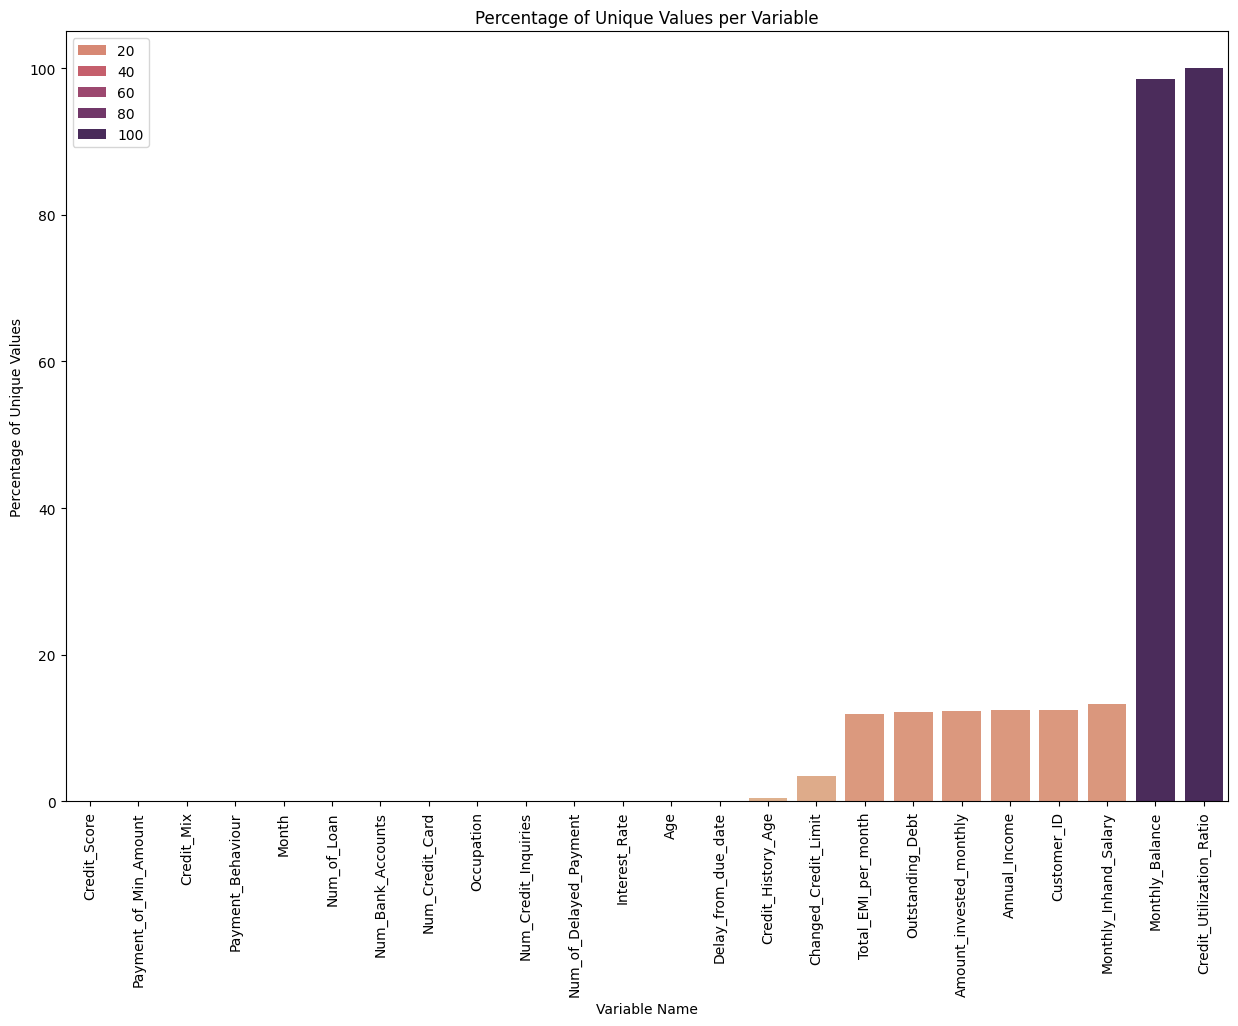

In [10]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.barplot(data = unique_value_df, x='column_name', y='percentage_of_unique_values', hue = 'percentage_of_unique_values', palette= 'flare', ax=ax)
ax.legend(loc='upper left')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_xlabel('Variable Name')
ax.set_ylabel('Percentage of Unique Values')
ax.set_title('Percentage of Unique Values per Variable')
plt.show()

### Finding Outliers

array([[<Axes: title={'center': 'Customer_ID'}>,
        <Axes: title={'center': 'Month'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Annual_Income'}>],
       [<Axes: title={'center': 'Monthly_Inhand_Salary'}>,
        <Axes: title={'center': 'Num_Bank_Accounts'}>,
        <Axes: title={'center': 'Num_Credit_Card'}>,
        <Axes: title={'center': 'Interest_Rate'}>],
       [<Axes: title={'center': 'Num_of_Loan'}>,
        <Axes: title={'center': 'Delay_from_due_date'}>,
        <Axes: title={'center': 'Num_of_Delayed_Payment'}>,
        <Axes: title={'center': 'Changed_Credit_Limit'}>],
       [<Axes: title={'center': 'Num_Credit_Inquiries'}>,
        <Axes: title={'center': 'Outstanding_Debt'}>,
        <Axes: title={'center': 'Credit_Utilization_Ratio'}>,
        <Axes: title={'center': 'Credit_History_Age'}>],
       [<Axes: title={'center': 'Total_EMI_per_month'}>,
        <Axes: title={'center': 'Amount_invested_monthly'}>,
        <Axes: title={

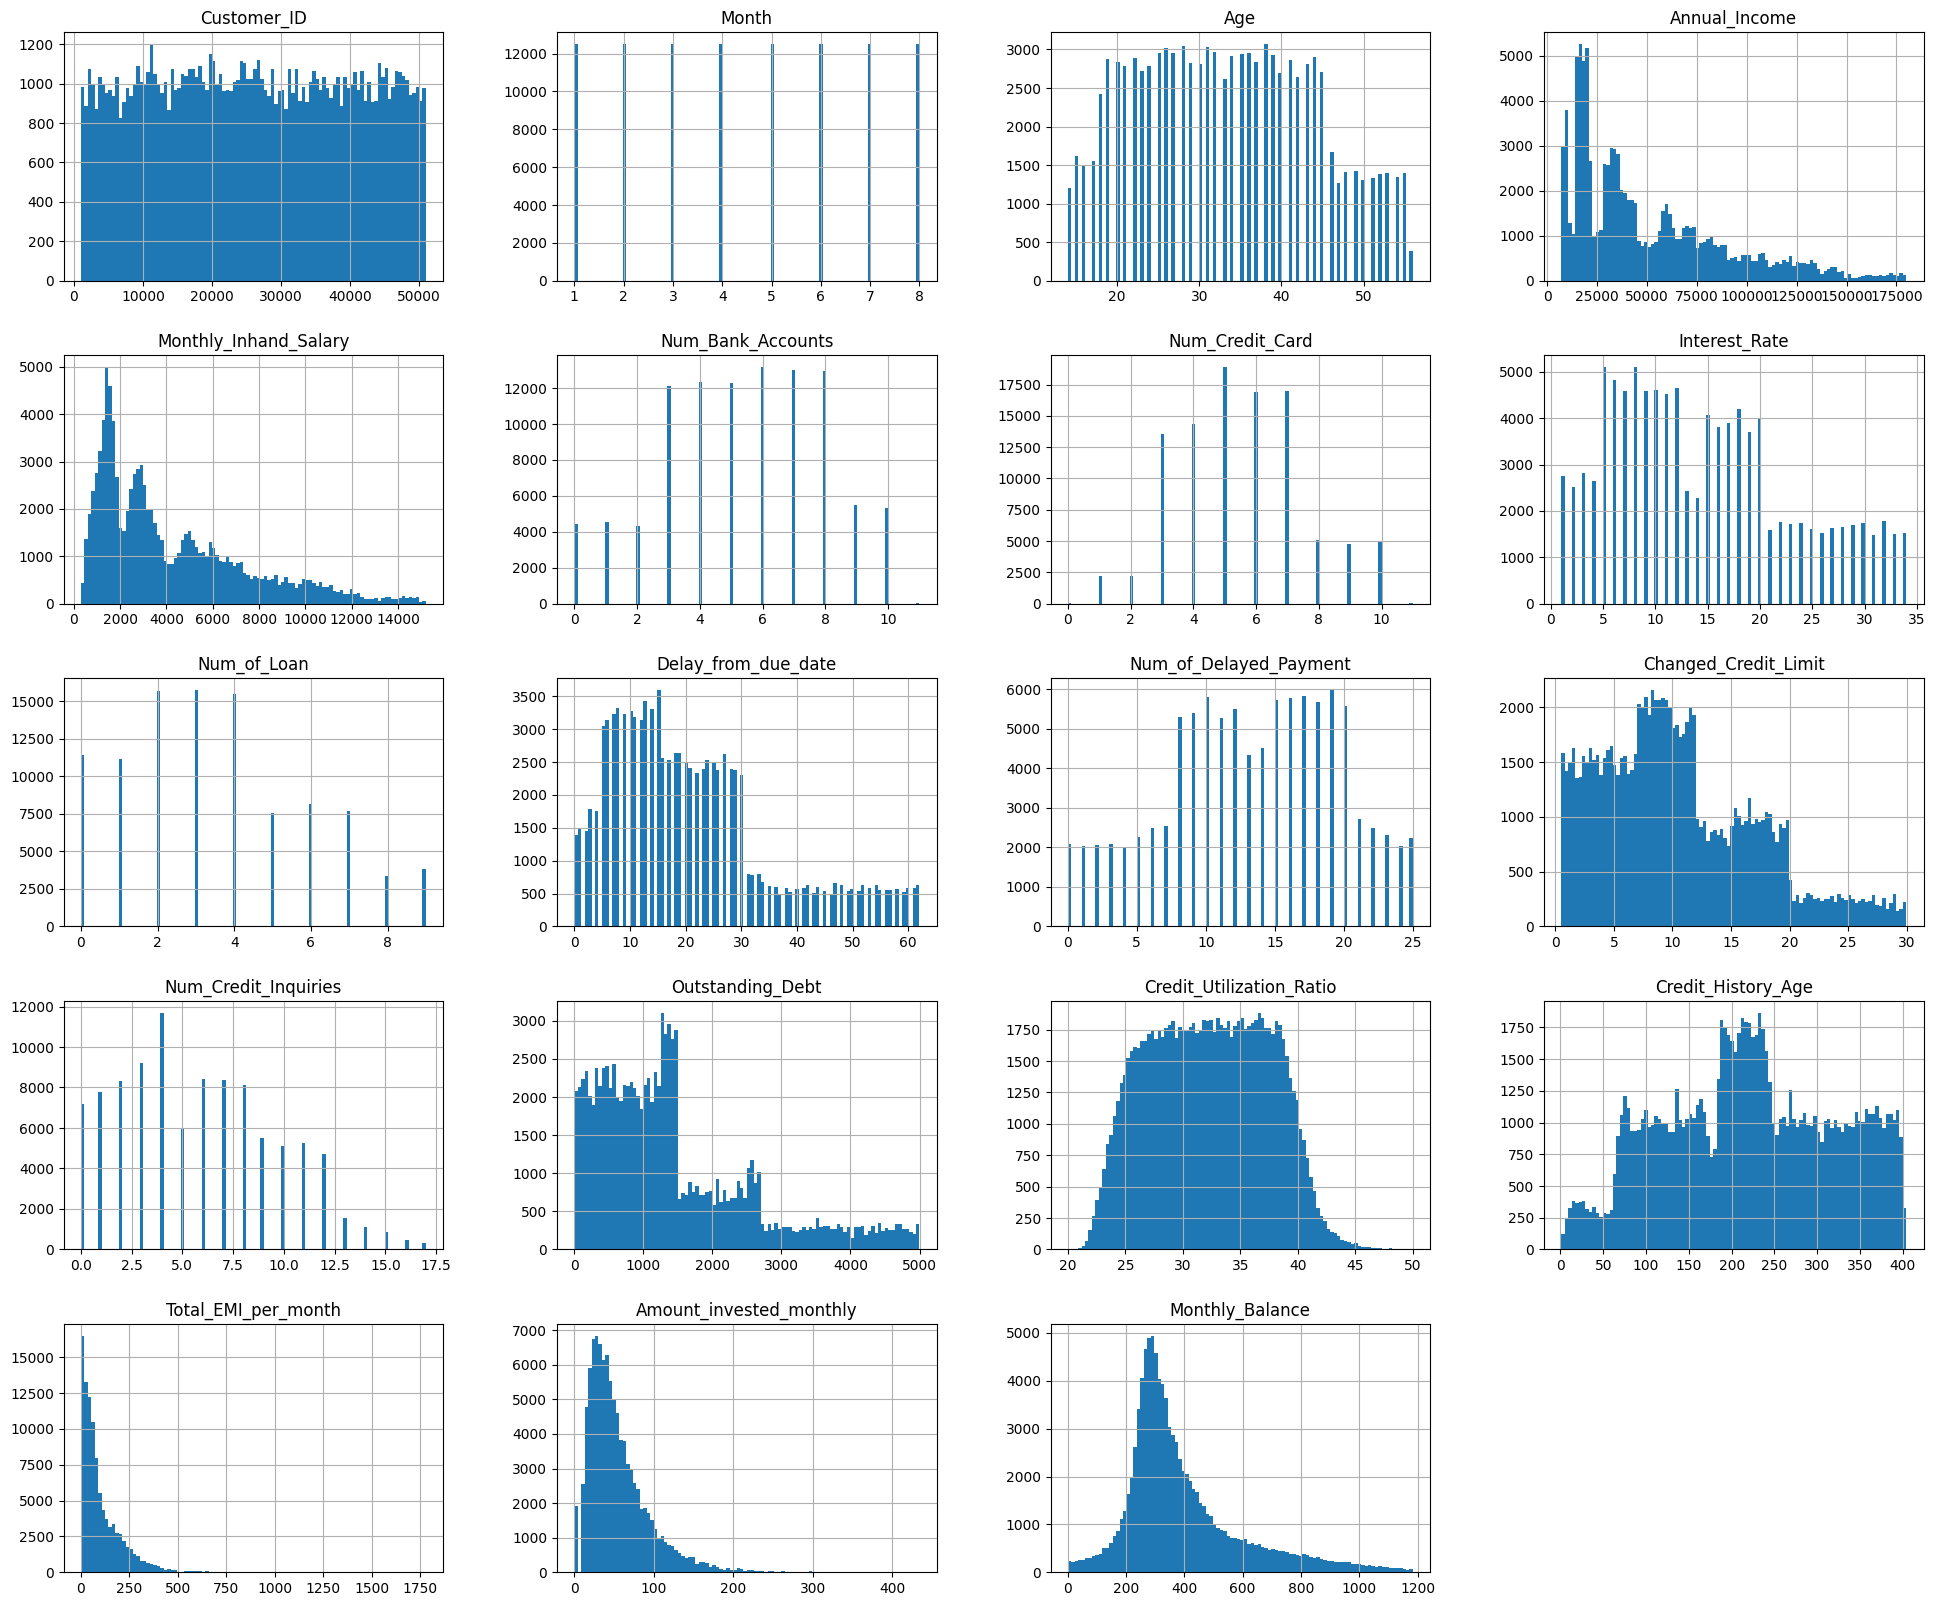

In [11]:
df.hist(figsize=(24,20), bins=100)

In [12]:
def delIQR(df, var_name):
  q1 = np.percentile(df[var_name], 25)
  q3 = np.percentile(df[var_name], 75)
  iqr = q3 - q1
  change = iqr * 1.5
  low = q1 - change
  high = q3 - change
  df = df.drop(df[(df[var_name] > high) | (df[var_name] < low)].index)
  return df

num_col = df.select_dtypes(include=[np.number]).columns

In [13]:
for i in num_col:
  new_df = delIQR(df, str(i))

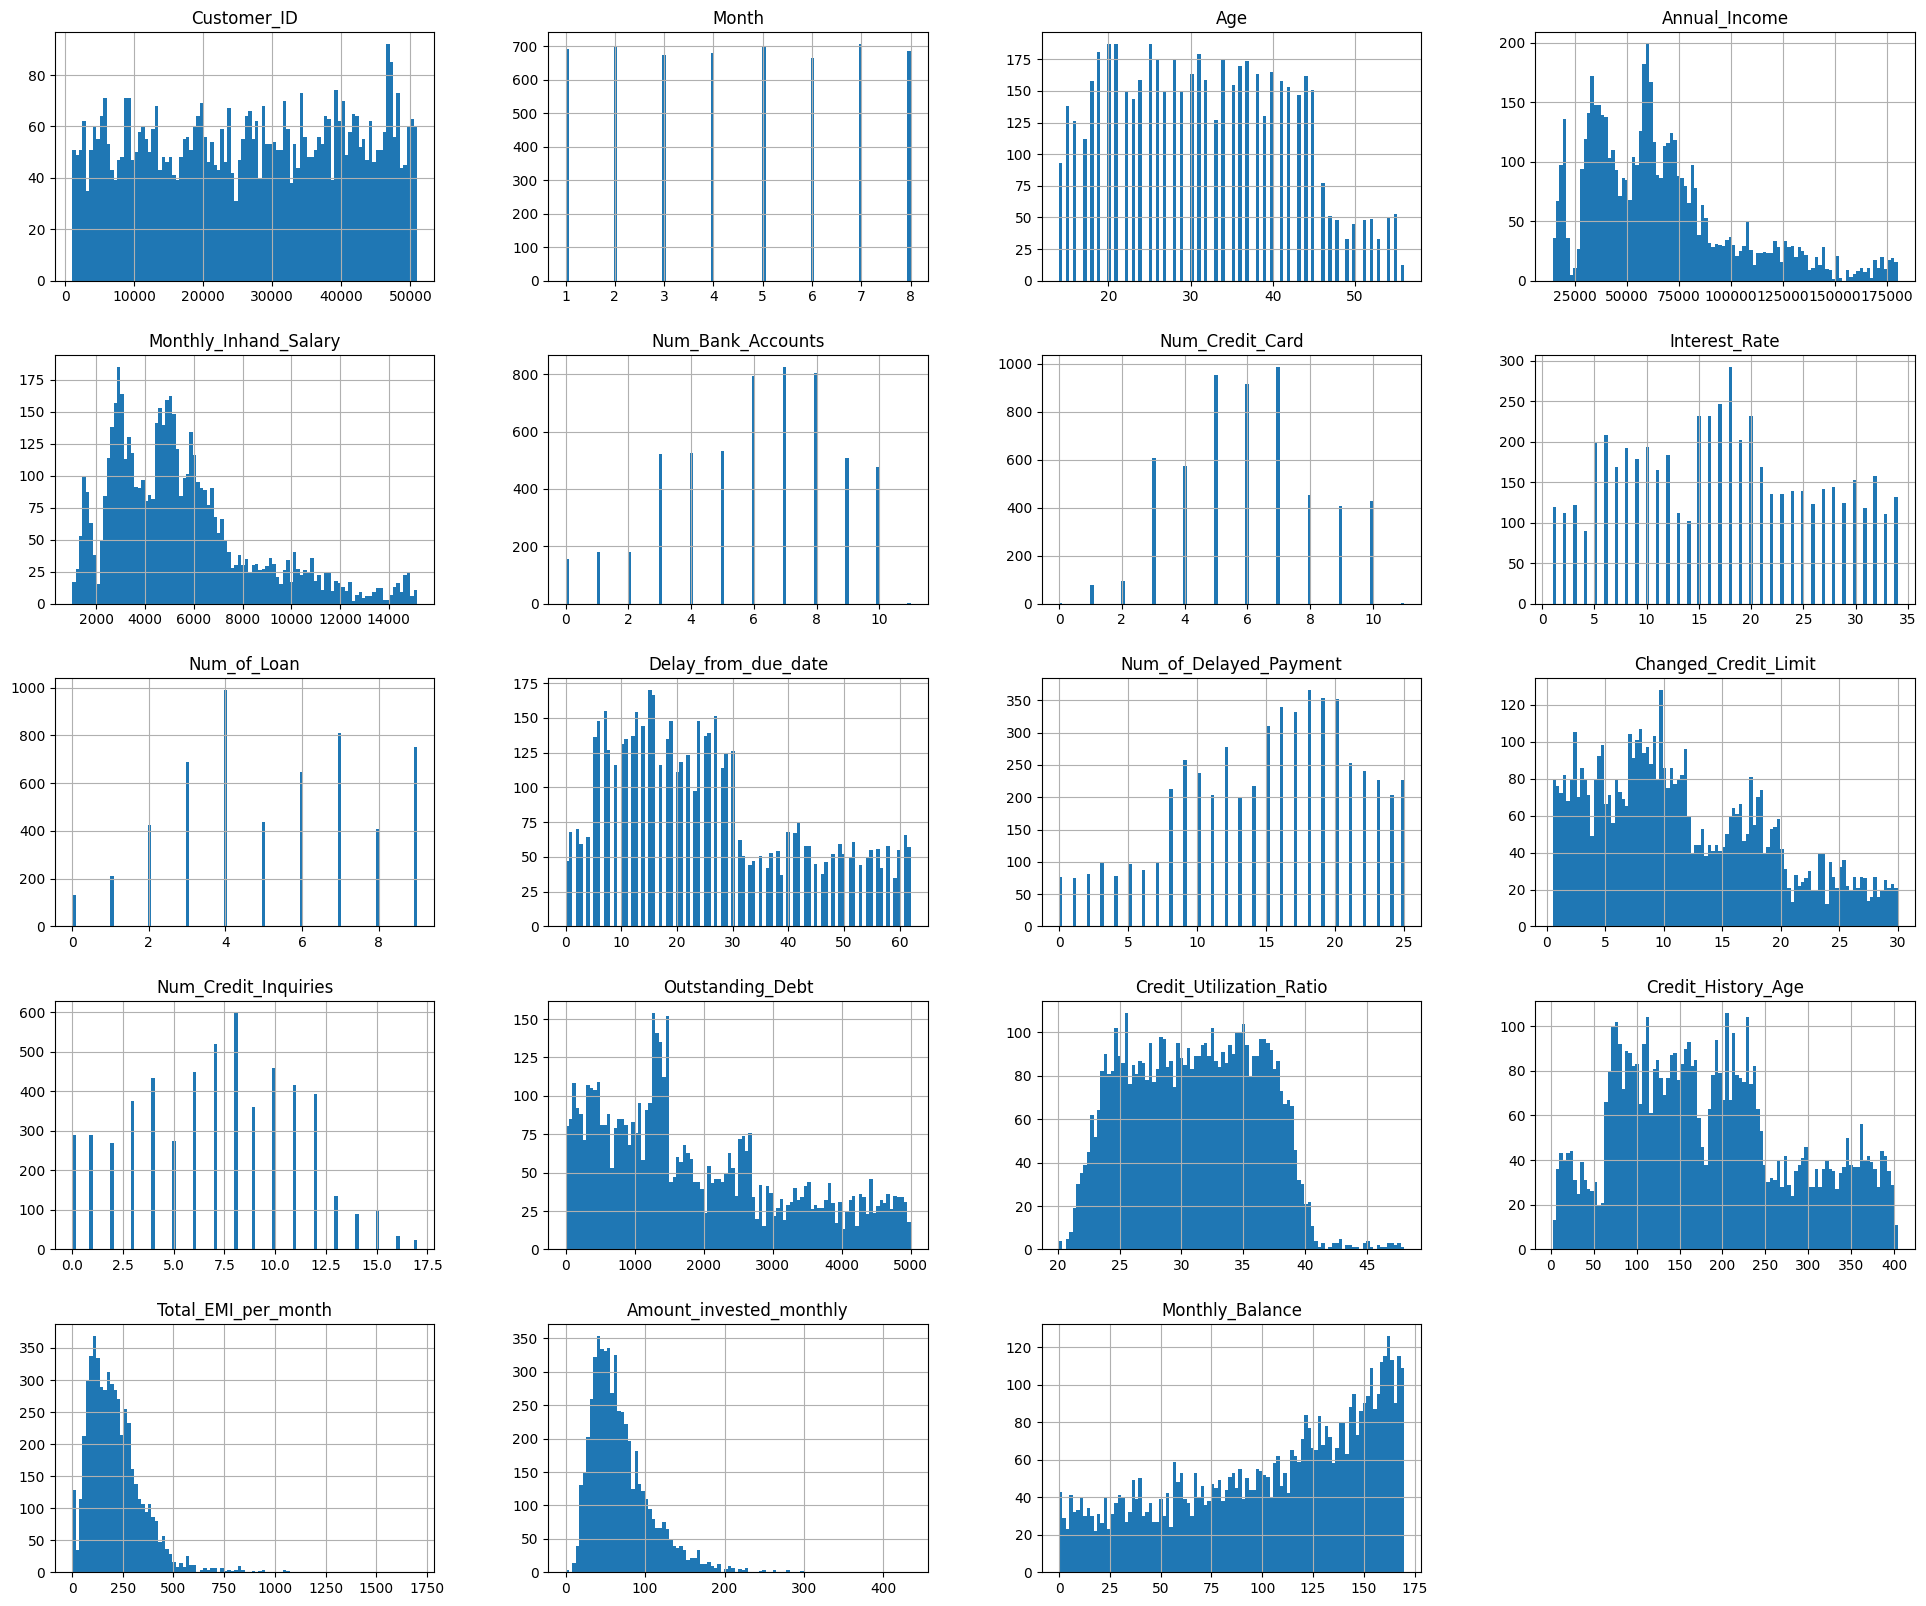

In [14]:
new_df.hist(figsize=(24,20), bins=100);

The shape doesn't change much. It means the result is already well behaved or the outlier doesn't impact the distribution.

## EDA

Credit_Score
Standard    53174
Poor        28998
Good        17828
Name: count, dtype: int64


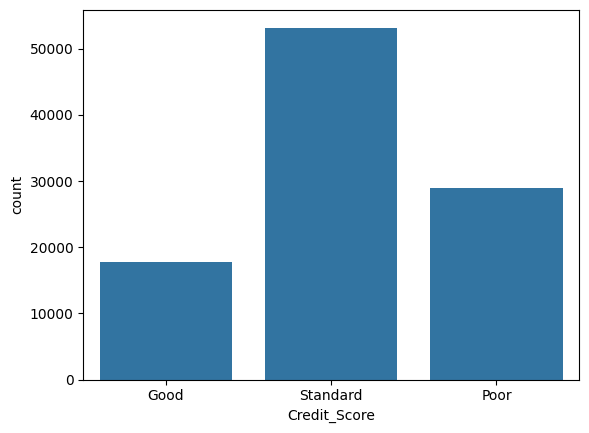

In [15]:
sns.countplot(data=df, x='Credit_Score')
print(df['Credit_Score'].value_counts())

<Axes: xlabel='Credit_Score', ylabel='Annual_Income'>

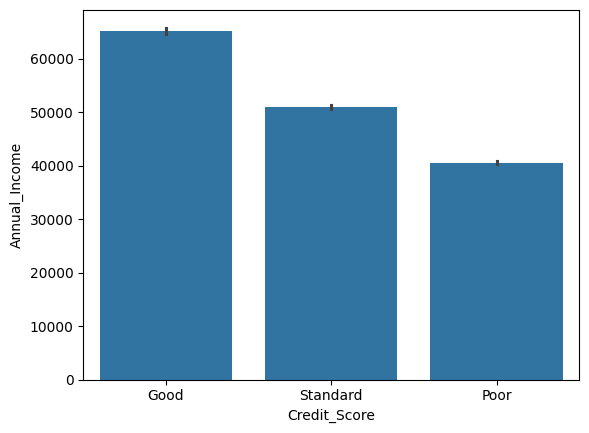

In [16]:
sns.barplot(data=df, x='Credit_Score', y = 'Annual_Income')

In [17]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 5)
df

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,3392,1,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,11.27,4.0,Good,809.98,26.822620,265.0,No,49.574949,21.465380,High_spent_Small_value_payments,312.494089,Good
1,3392,2,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,4.0,11.27,4.0,Good,809.98,31.944960,266.0,No,49.574949,21.465380,Low_spent_Large_value_payments,284.629162,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99998,37932,7,25.0,Mechanic,39628.99,3359.415833,4.0,6.0,7.0,2.0,20.0,6.0,11.50,3.0,Good,502.38,33.638208,381.0,No,35.104023,24.028477,Low_spent_Large_value_payments,319.164979,Standard
99999,37932,8,25.0,Mechanic,39628.99,3359.415833,4.0,6.0,7.0,2.0,18.0,6.0,11.50,3.0,Good,502.38,34.192463,382.0,No,35.104023,24.028477,High_spent_Medium_value_payments,393.673696,Poor


In [18]:
df.columns

Index(['Customer_ID', 'Month', 'Age', 'Occupation', 'Annual_Income',
       'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card',
       'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [19]:
# num_col

fil_numcol = ['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate','Num_of_Loan',
             'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit','Num_Credit_Inquiries','Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Monthly_Balance']
fil_otcol = ['Month', 'Occupation' , 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour']

In [20]:
len(fil_otcol)

5

### Categorical Plot

In [21]:
def cat_plot(df, i):
    a = df.groupby([i, 'Credit_Score']).count()['Customer_ID'].reset_index()
    mo_pi = a.pivot(index=i, columns='Credit_Score', values='Customer_ID')
    mo_pi.plot(kind='bar', figsize=(12, 6))
    plt.title(f'Count of Customer IDs by {i} and Credit Score')
    plt.xlabel(f'{i}')
    plt.ylabel('Count of Customer IDs')
    plt.legend(title='Credit Score')
    plt.show()

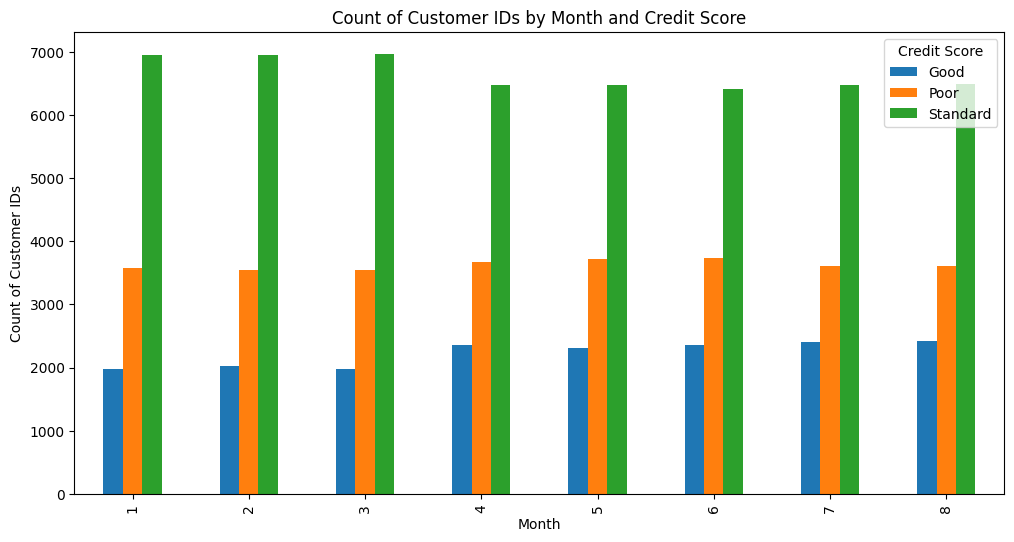

In [22]:
# Month
cat_plot(df, 'Month')

The good and the poor credit score is increasing along the time period, while the standard credit score is decreasing

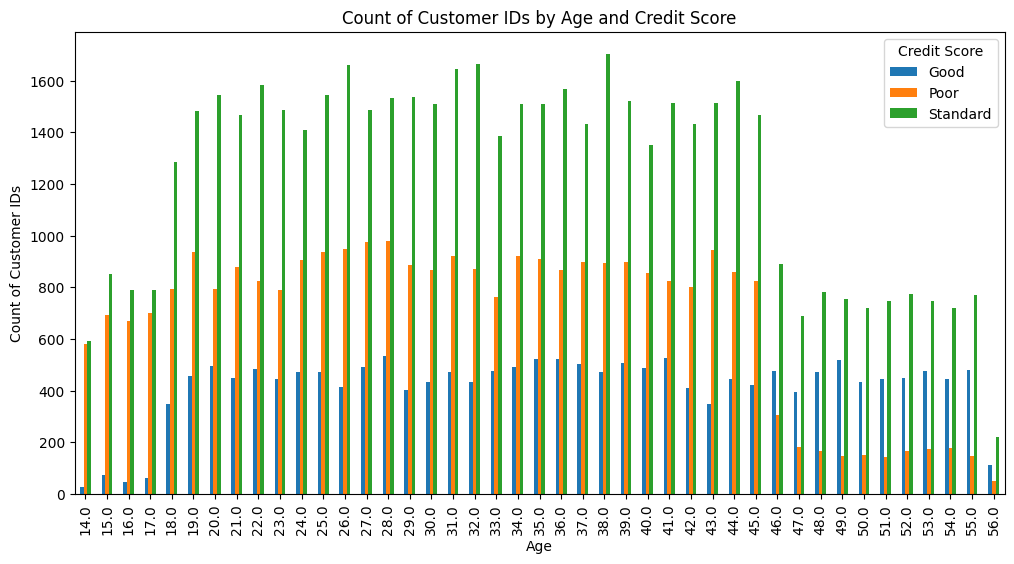

In [23]:
# Age
# Age is put here despite being numerical to observe the characteristic in general
cat_plot(df, 'Age')

There are 3 age groups based on the result of the graph, which are from age 14-17 (adolescent), 18-45 (adult), and 46-56 (elderly). Adult user is the peak age where people apply for the credit card. The elderly group may have more stable financial, makes them the least group who ask for credit.

In [24]:
df['Age_Group'] = pd.cut(df['Age'], bins=[0, 18, 46, float('inf')], labels=['Adolescent', 'Adult', 'Elderly'])

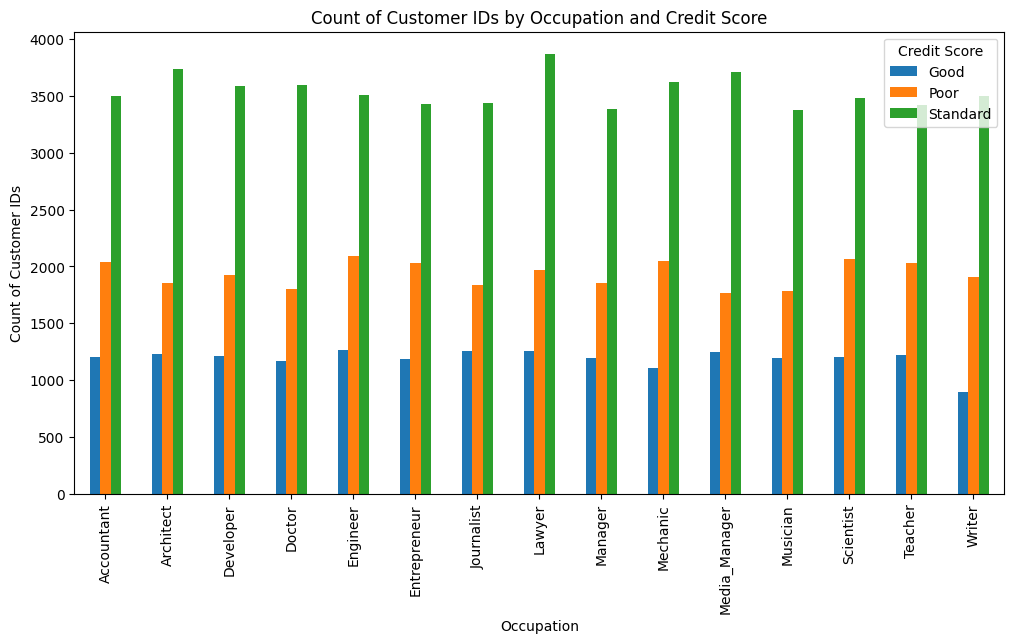

In [25]:
cat_plot(df, 'Occupation')

The count for each occupations have similar pattern.

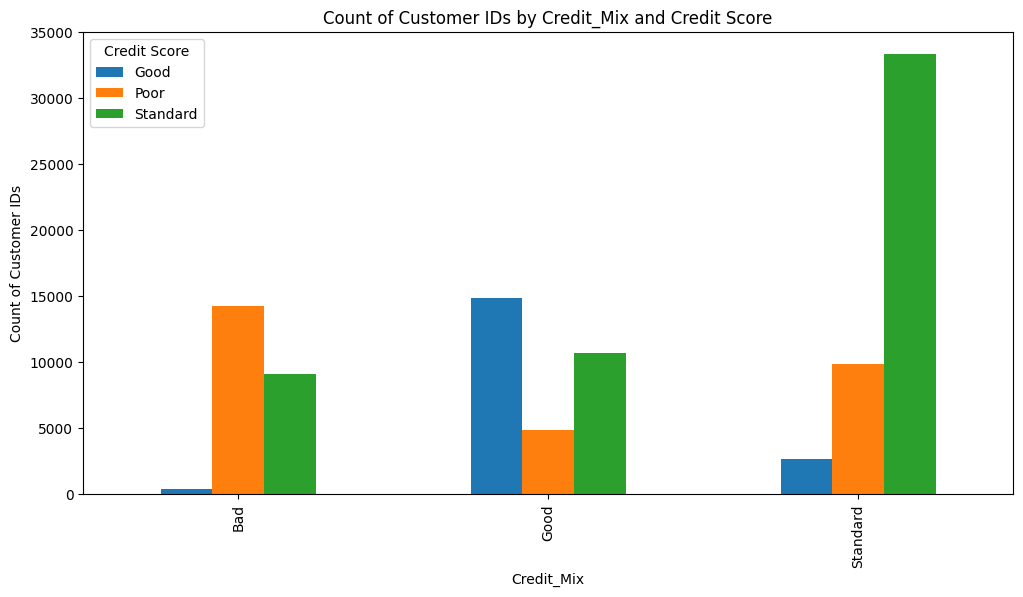

In [26]:
cat_plot(df, 'Credit_Mix')

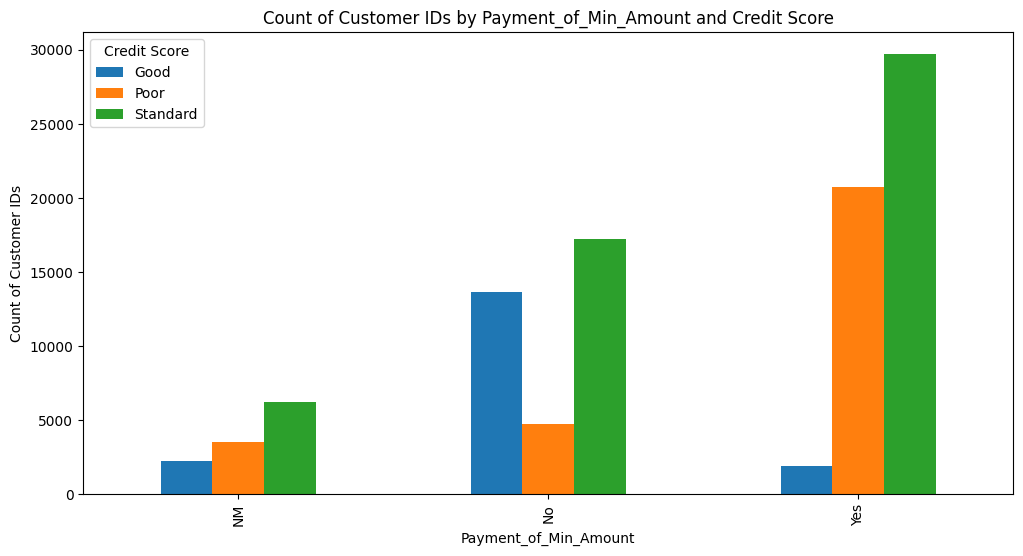

In [27]:
cat_plot(df, 'Payment_of_Min_Amount')

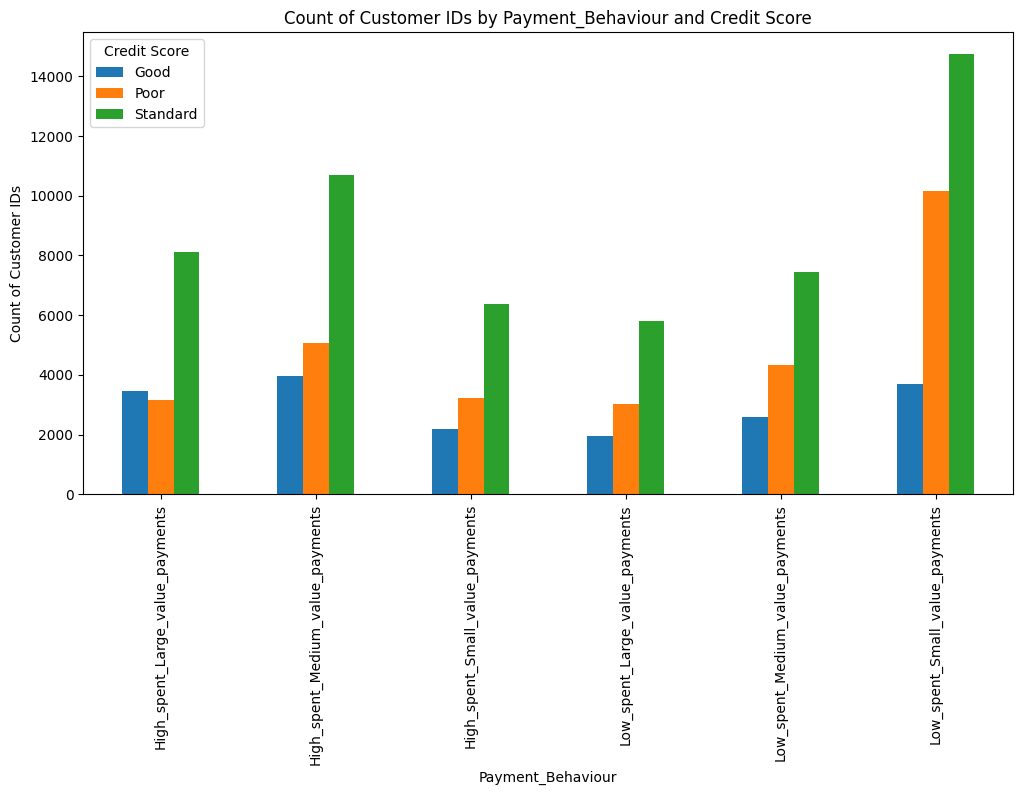

In [28]:
cat_plot(df, 'Payment_Behaviour')

## Prediction

In [29]:
dfTrain = df.copy()
# dfTrain.columns
dfTrain = dfTrain.drop(['Customer_ID', 'Age'], axis=1)
dfTrain.head()

,Month,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Age_Group
0,1,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,11.27,4.0,Good,809.98,26.822620,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good,Adult
1,2,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,4.0,11.27,4.0,Good,809.98,31.944960,266.0,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629162,Good,Adult
2,3,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,11.27,4.0,Good,809.98,28.609352,267.0,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,Good,Adult
3,4,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,5.0,4.0,6.27,4.0,Good,809.98,31.377862,268.0,No,49.574949,21.46538,Low_spent_Small_value_payments,223.451310,Good,Adult
4,5,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,6.0,4.0,11.27,4.0,Good,809.98,24.797347,269.0,No,49.574949,21.46538,High_spent_Medium_value_payments,341.489231,Good,Adult


In [30]:
fil_otcol.append('Age_Group')
fil_otcol

['Month',
 'Occupation',
 'Credit_Mix',
 'Payment_of_Min_Amount',
 'Payment_Behaviour',
 'Age_Group']

In [31]:
df['Credit_Mix']

0        Good
1        Good
         ... 
99998    Good
99999    Good
Name: Credit_Mix, Length: 100000, dtype: object

In [32]:
mapping = {'Poor': 0, 'Standard': 1, 'Good': 2}
df_Train = pd.get_dummies(dfTrain, columns = ['Occupation', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour', 'Age_Group'])
df_Train['Credit_Score'] = df_Train['Credit_Score'].map(mapping)
df_Train.head()

,Month,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score,Occupation_Accountant,Occupation_Architect,Occupation_Developer,Occupation_Doctor,Occupation_Engineer,Occupation_Entrepreneur,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_Media_Manager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer,Credit_Mix_Bad,Credit_Mix_Good,Credit_Mix_Standard,Payment_of_Min_Amount_NM,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes,Payment_Behaviour_High_spent_Large_value_payments,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments,Age_Group_Adolescent,Age_Group_Adult,Age_Group_Elderly
0,1,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,11.27,4.0,809.98,26.822620,265.0,49.574949,21.46538,312.494089,2,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,True,False,False,False,True,False,False,False,False,True,False
1,2,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,4.0,11.27,4.0,809.98,31.944960,266.0,49.574949,21.46538,284.629162,2,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,True,False,False,False,False,True,False,False,False,True,False
2,3,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,11.27,4.0,809.98,28.609352,267.0,49.574949,21.46538,331.209863,2,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,True,False,False,False,False,False,True,False,False,True,False
3,4,19114.12,1824.843333,3.0,4.0,3.0,4.0,5.0,4.0,6.27,4.0,809.98,31.377862,268.0,49.574949,21.46538,223.451310,2,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False,True,False
4,5,19114.12,1824.843333,3.0,4.0,3.0,4.0,6.0,4.0,11.27,4.0,809.98,24.797347,269.0,49.574949,21.46538,341.489231,2,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,True,False,False,True,False,False,False,False,False,True,False


In [37]:
# Checking the correlation
corr = df_Train.corr()
unstack_corr = corr.unstack().sort_values(ascending=False).reset_index()
unstack_corr =  unstack_corr[unstack_corr['level_0'] != unstack_corr['level_1']]

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
unstack_corr

,level_0,level_1,0
48,Monthly_Inhand_Salary,Annual_Income,9.981538e-01
49,Annual_Income,Monthly_Inhand_Salary,9.981538e-01
50,Monthly_Inhand_Salary,Amount_invested_monthly,8.073264e-01
51,Amount_invested_monthly,Monthly_Inhand_Salary,8.073264e-01
52,Amount_invested_monthly,Annual_Income,8.062806e-01
53,Annual_Income,Amount_invested_monthly,8.062806e-01
54,Credit_Mix_Bad,Outstanding_Debt,7.609324e-01
55,Outstanding_Debt,Credit_Mix_Bad,7.609324e-01
56,Credit_Mix_Good,Payment_of_Min_Amount_No,7.209929e-01
57,Payment_of_Min_Amount_No,Credit_Mix_Good,7.209929e-01


In [34]:
# ['Occupation', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour', 'Age_Group']

In [38]:
X = df_Train.drop(['Credit_Score', 'Occupation_Architect', 'Credit_Mix_Bad', 'Payment_of_Min_Amount_No', 'Payment_Behaviour_Low_spent_Small_value_payments', 'Age_Group_Elderly'], axis=1)
y = df_Train['Credit_Score']
scale = StandardScaler()
X_new = scale.fit_transform(X)

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

In [40]:
def model_fit(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return y_pred

In [41]:
def measurement(X_train, X_test, y_train, y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1score = f1_score(y_test, y_pred, average='macro')
#     tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
#     specificity = tn / (tn+fp)

    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
#     print(f"Specificity: {specificity}")
    print(f"f1 score: {f1score}")

In [42]:
def conf_matrix(y_test, y_pred, name):
    confmat = confusion_matrix(y_test, y_pred)

    fig, ax = plt.subplots(figsize=(10, 8))
    sns.heatmap(confmat, annot=True, fmt='d', xticklabels=name, yticklabels=name)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')
    ax.set_title('Confusion Matrix')
    plt.show()

#### Logistic Regression

In [40]:
y_pred = model_fit(LogisticRegression(), X_train, X_test, y_train, y_test)
measurement(X_train, X_test, y_train, y_test, y_pred)

Accuracy: 0.66195
Precision: 0.6404527849120799
Recall: 0.6449366116026353
f1 score: 0.6392953546053506


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


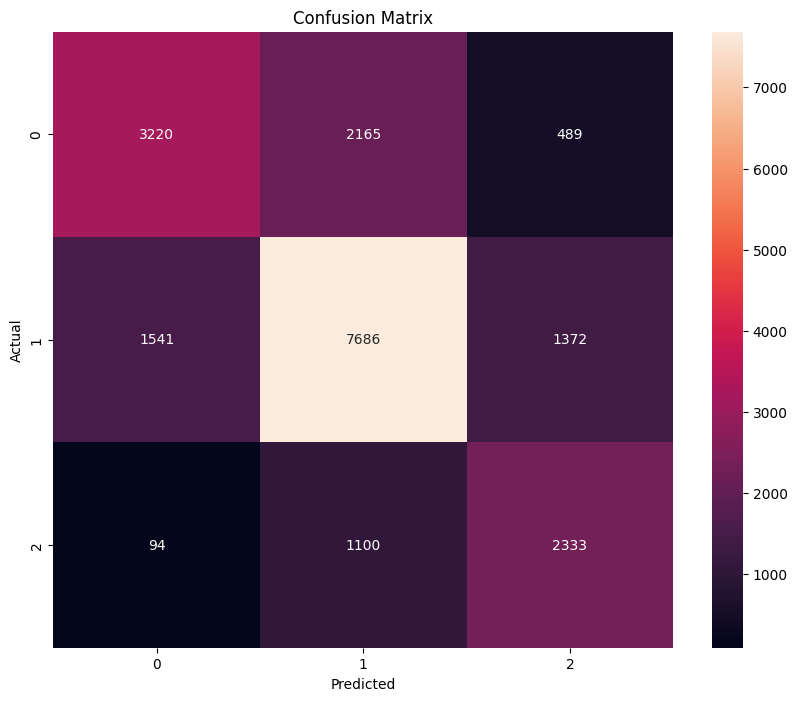

In [41]:
conf_matrix(y_test, y_pred, ['0', '1', '2'])

#### Decision Tree

In [42]:
y_pred = model_fit(DecisionTreeClassifier(), X_train, X_test, y_train, y_test)
measurement(X_train, X_test, y_train, y_test, y_pred)

Accuracy: 0.74415
Precision: 0.7308991317750712
Recall: 0.7266954309459148
f1 score: 0.7287528909731891


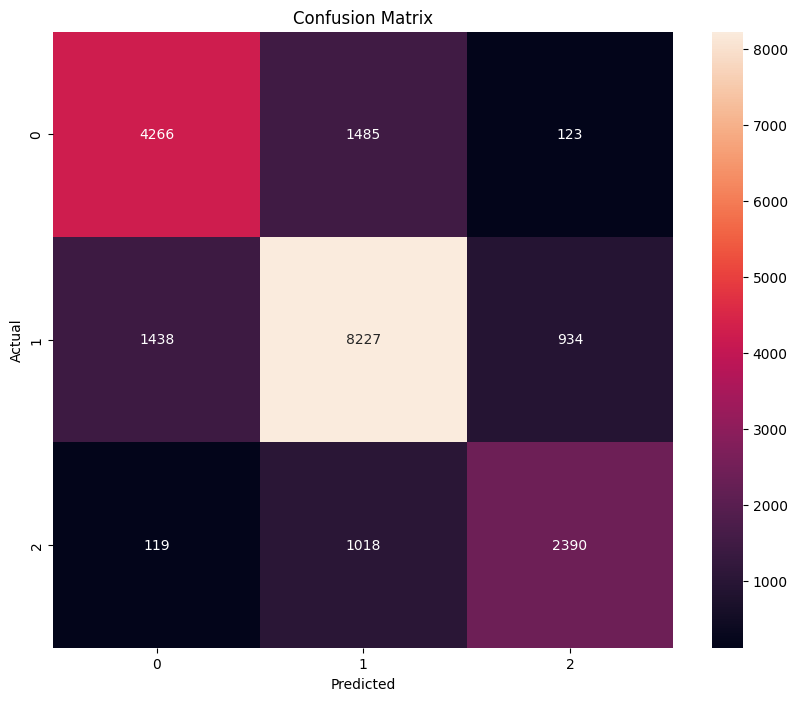

In [43]:
conf_matrix(y_test, y_pred, ['0', '1', '2'])

#### Random Forest Classifier

In [44]:
y_pred = model_fit(RandomForestClassifier(), X_train, X_test, y_train, y_test)
measurement(X_train, X_test, y_train, y_test, y_pred)

Accuracy: 0.8312
Precision: 0.8227568214121875
Recall: 0.8261260538590173
f1 score: 0.8242109136530195


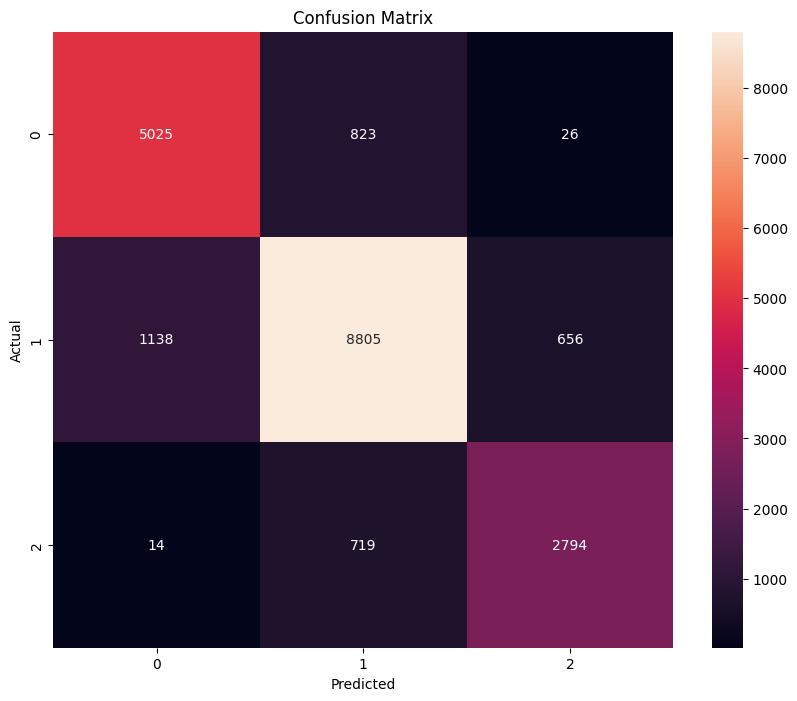

In [45]:
conf_matrix(y_test, y_pred, ['0', '1', '2'])

#### K Neighbors Classifier

In [48]:
y_pred = model_fit(KNeighborsClassifier(), X_train, X_test, y_train, y_test)
measurement(X_train, X_test, y_train, y_test, y_pred)

Accuracy: 0.6827
Precision: 0.6608149425998281
Recall: 0.6391014583355157
f1 score: 0.6482229611657054


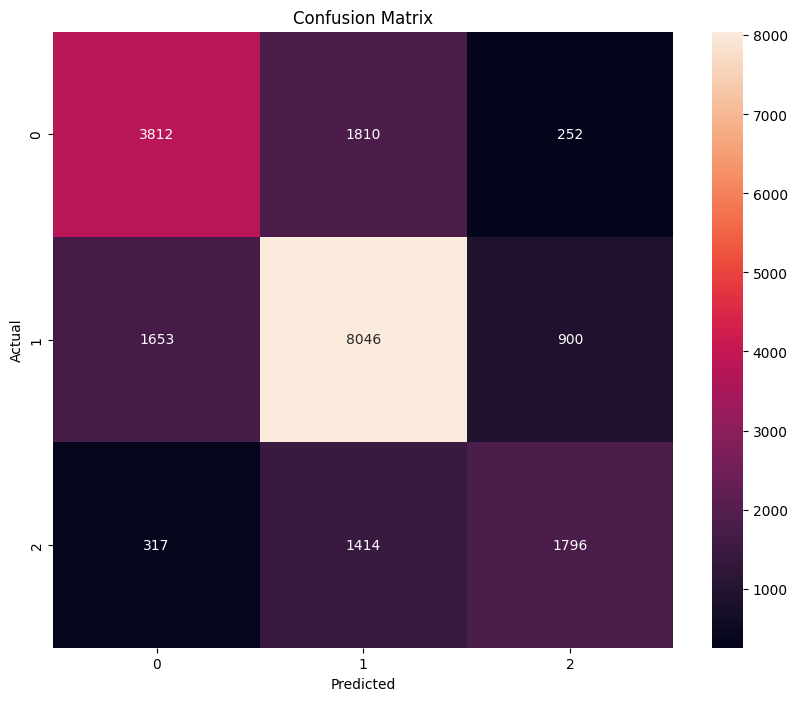

In [49]:
conf_matrix(y_test, y_pred, ['0', '1', '2'])

#### XG Boost

In [53]:
y_pred = model_fit(XGBClassifier(), X_train, X_test, y_train, y_test)
measurement(X_train, X_test, y_train, y_test, y_pred)

Accuracy: 0.77815
Precision: 0.7630412209308984
Recall: 0.7664722395722109
f1 score: 0.7646497672779565


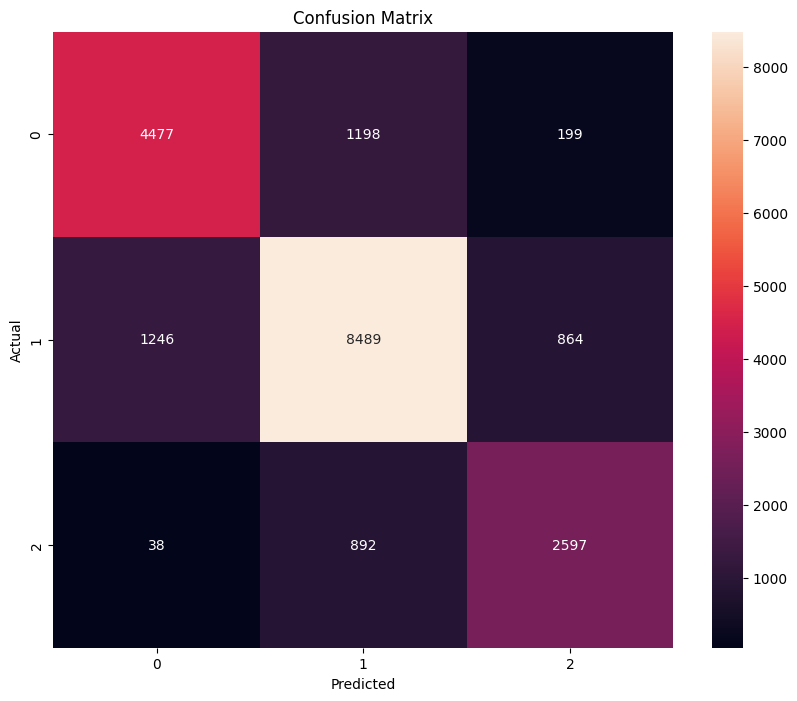

In [54]:
conf_matrix(y_test, y_pred, ['0', '1', '2'])

### Feature Testing
Random forest has the highest accuracy. Let's try to improve the accuracy more by feature testing!


The result is not better compared to before feature testing.

In [80]:
corr['Credit_Score'].abs().sort_values(ascending=False)

Credit_Score                                          1.000000
Interest_Rate                                         0.485409
Num_Credit_Inquiries                                  0.435113
Delay_from_due_date                                   0.431446
Credit_Mix_Good                                       0.431274
Num_Credit_Card                                       0.404435
Payment_of_Min_Amount_No                              0.398371
Credit_Mix_Bad                                        0.392631
Credit_History_Age                                    0.388788
Num_Bank_Accounts                                     0.388165
Outstanding_Debt                                      0.386525
Payment_of_Min_Amount_Yes                             0.384088
Num_of_Delayed_Payment                                0.372978
Num_of_Loan                                           0.358355
Annual_Income                                         0.212606
Monthly_Inhand_Salary                                 0

In [60]:
model = LogisticRegression()
model.fit(X_train, y_train)

coefficients = model.coef_[0]
column_name = df_Train.columns

# sorting the value based on the index
sorted_index = np.argsort(np.abs(coefficients))[::-1]

for i in sorted_index:
    print(f"{column_name[i]}: {coefficients[i]}")

Annual_Income: -0.5314882531740023
Monthly_Inhand_Salary: 0.5230171182431861
Interest_Rate: 0.39111595691686657
Occupation_Teacher: 0.3569852280679621
Delay_from_due_date: 0.2984834876316103
Num_Credit_Card: 0.28937825341860485
Changed_Credit_Limit: -0.2824691920015618
Num_Credit_Inquiries: 0.27333883041981794
Credit_Mix_Good: 0.2346734099446126
Num_of_Loan: 0.16058505151616587
Credit_Mix_Standard: -0.15093730334783276
Monthly_Balance: 0.13529791784829123
Payment_of_Min_Amount_NM: -0.13435144877931854
Total_EMI_per_month: -0.1259436547956045
Credit_History_Age: -0.12486997945136522
Occupation_Writer: 0.12010498524659308
Outstanding_Debt: 0.11857781191736717
Payment_of_Min_Amount_No: -0.0923236853406493
Credit_Mix_Bad: 0.0854967399095907
Num_of_Delayed_Payment: -0.0581874083550319
Payment_of_Min_Amount_Yes: -0.05755478962155671
Payment_Behaviour_High_spent_Small_value_payments: 0.05399713946137251
Month: -0.053024220407252264
Payment_Behaviour_High_spent_Medium_value_payments: 0.0407534

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [62]:
col_drop = []

for i in abs(sorted_index):
  if coefficients[i] > 0.25:
    col_drop.append(column_name[i])

col_drop

['Monthly_Inhand_Salary',
 'Interest_Rate',
 'Occupation_Teacher',
 'Delay_from_due_date',
 'Num_Credit_Card',
 'Num_Credit_Inquiries']

In [71]:
col_drop1 = []

for i in abs(sorted_index):
  if coefficients[i] <= 0.01:
    col_drop1.append(column_name[i])

col_drop1

['Annual_Income',
 'Changed_Credit_Limit',
 'Credit_Mix_Standard',
 'Payment_of_Min_Amount_NM',
 'Total_EMI_per_month',
 'Credit_History_Age',
 'Payment_of_Min_Amount_No',
 'Num_of_Delayed_Payment',
 'Payment_of_Min_Amount_Yes',
 'Month',
 'Payment_Behaviour_High_spent_Large_value_payments',
 'Amount_invested_monthly',
 'Occupation_Manager',
 'Occupation_Engineer',
 'Occupation_Accountant',
 'Occupation_Mechanic',
 'Credit_Utilization_Ratio',
 'Occupation_Entrepreneur',
 'Occupation_Architect',
 'Occupation_Developer',
 'Occupation_Musician',
 'Occupation_Journalist']

In [64]:
df_Trainfs = df_Train.drop(col_drop, axis=1)
df_Trainfs.columns

Index(['Month', 'Annual_Income', 'Num_Bank_Accounts', 'Num_of_Loan',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Monthly_Balance', 'Credit_Score',
       'Occupation_Accountant', 'Occupation_Architect', 'Occupation_Developer',
       'Occupation_Doctor', 'Occupation_Engineer', 'Occupation_Entrepreneur',
       'Occupation_Journalist', 'Occupation_Lawyer', 'Occupation_Manager',
       'Occupation_Mechanic', 'Occupation_Media_Manager',
       'Occupation_Musician', 'Occupation_Scientist', 'Occupation_Writer',
       'Credit_Mix_Bad', 'Credit_Mix_Good', 'Credit_Mix_Standard',
       'Payment_of_Min_Amount_NM', 'Payment_of_Min_Amount_No',
       'Payment_of_Min_Amount_Yes',
       'Payment_Behaviour_High_spent_Large_value_payments',
       'Payment_Behaviour_High_spent_Medium_value_payments',
       'Payment_Behaviour_High_spent_Small_value_pay

In [72]:
df_Trainfs1 = df_Train.drop(col_drop1, axis=1)
df_Trainfs1.columns

Index(['Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card',
       'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Monthly_Balance',
       'Credit_Score', 'Occupation_Doctor', 'Occupation_Lawyer',
       'Occupation_Media_Manager', 'Occupation_Scientist',
       'Occupation_Teacher', 'Occupation_Writer', 'Credit_Mix_Bad',
       'Credit_Mix_Good', 'Payment_Behaviour_High_spent_Medium_value_payments',
       'Payment_Behaviour_High_spent_Small_value_payments',
       'Payment_Behaviour_Low_spent_Large_value_payments',
       'Payment_Behaviour_Low_spent_Medium_value_payments',
       'Payment_Behaviour_Low_spent_Small_value_payments',
       'Age_Group_Adolescent', 'Age_Group_Adult', 'Age_Group_Elderly'],
      dtype='object')

In [65]:
X = df_Trainfs.drop(['Credit_Score', 'Occupation_Architect', 'Credit_Mix_Bad', 'Payment_of_Min_Amount_No', 'Payment_Behaviour_Low_spent_Small_value_payments', 'Age_Group_Elderly'], axis=1)
y = df_Trainfs['Credit_Score']
scale = StandardScaler()
X_new = scale.fit_transform(X)

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

In [74]:
X1 = df_Trainfs1.drop(['Credit_Score','Credit_Mix_Bad', 'Payment_Behaviour_Low_spent_Small_value_payments', 'Age_Group_Elderly'], axis=1)
y1 = df_Trainfs1['Credit_Score']
scale = StandardScaler()
X_new1 = scale.fit_transform(X1)

In [75]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_new1, y1, test_size=0.2, random_state=42)

#### Logistic Regression (Higher Threshold Selection)

In [67]:
y_pred = model_fit(LogisticRegression(), X_train, X_test, y_train, y_test)
measurement(X_train, X_test, y_train, y_test, y_pred)

Accuracy: 0.62785
Precision: 0.6052343889022117
Recall: 0.6173639368012404
f1 score: 0.600358178165407


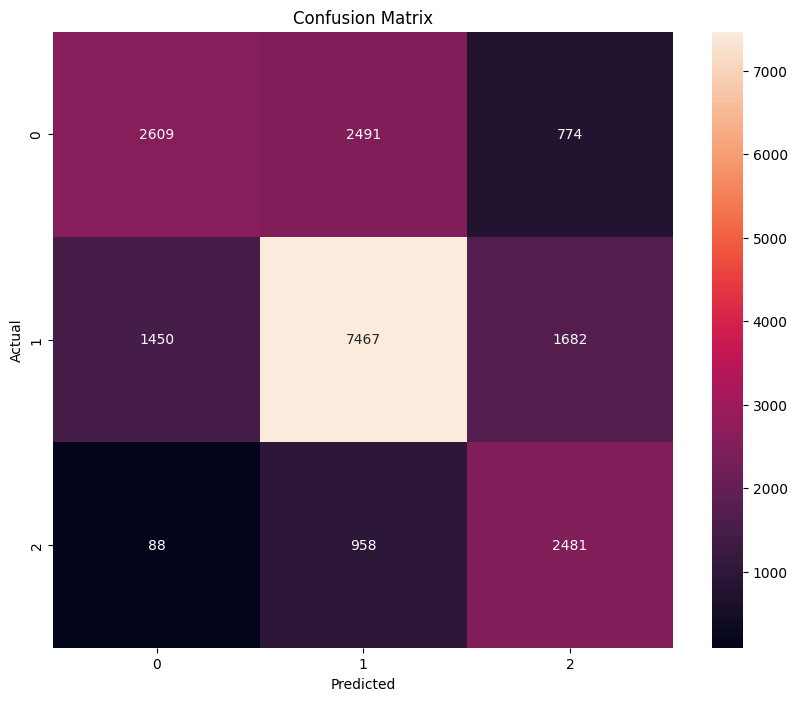

In [68]:
conf_matrix(y_test, y_pred, ['0', '1', '2'])

#### Random Forest Classifier (Higher Threshold Selection)

In [69]:
y_pred = model_fit(RandomForestClassifier(), X_train, X_test, y_train, y_test)
measurement(X_train, X_test, y_train, y_test, y_pred)

Accuracy: 0.8165
Precision: 0.8050716256913715
Recall: 0.8095124461541553
f1 score: 0.8072420479129354


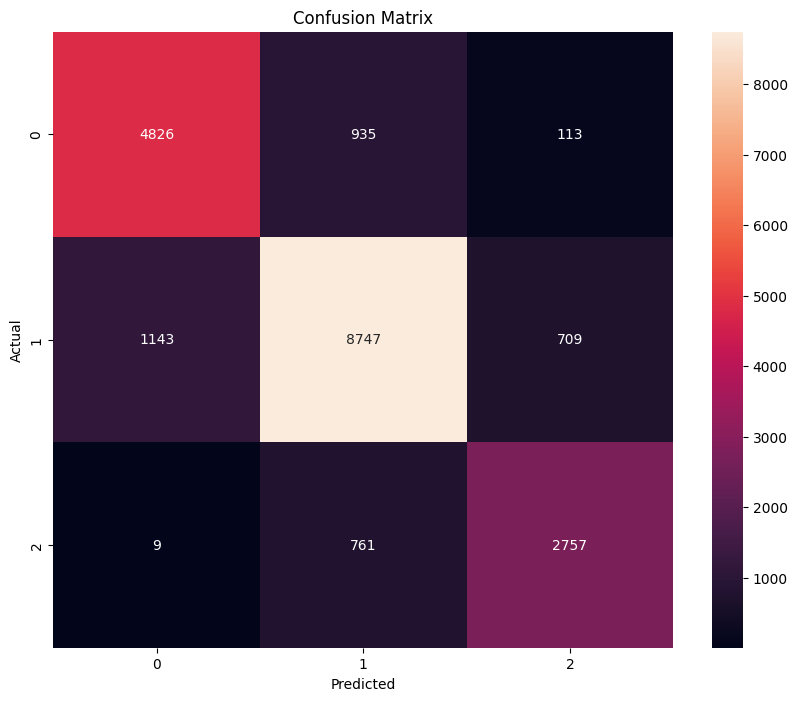

In [70]:
conf_matrix(y_test, y_pred, ['0', '1', '2'])

#### Logistic Regression (Lower Threshold Selection)

In [76]:
y_pred1 = model_fit(LogisticRegression(), X_train1, X_test1, y_train1, y_test1)
measurement(X_train1, X_test1, y_train1, y_test1, y_pred1)

Accuracy: 0.64325
Precision: 0.6211574292708929
Recall: 0.6361275727566318
f1 score: 0.6243825308644505


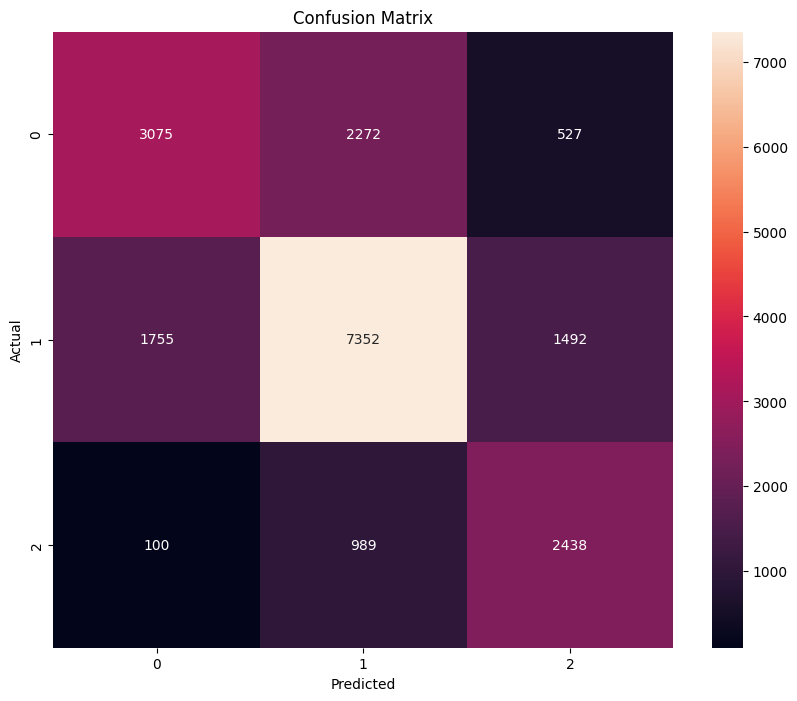

In [77]:
conf_matrix(y_test1, y_pred1, ['0', '1', '2'])

#### Random Forest Classifier (Lower Threshold Selection)

In [78]:
y_pred1 = model_fit(RandomForestClassifier(), X_train1, X_test1, y_train1, y_test1)
measurement(X_train1, X_test1, y_train1, y_test1, y_pred1)

Accuracy: 0.79285
Precision: 0.7834987082241538
Recall: 0.7805561778250137
f1 score: 0.7819078499528538


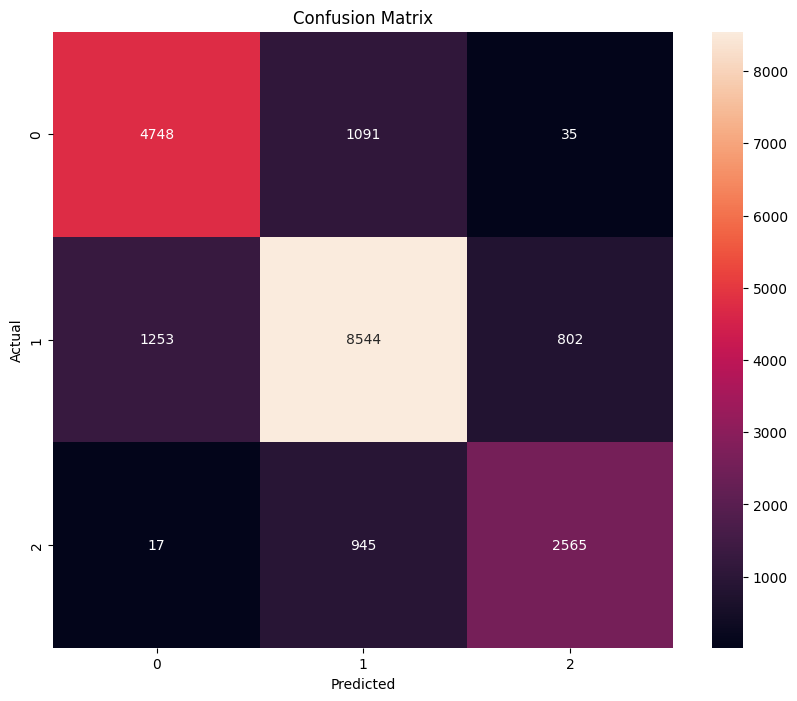

In [79]:
conf_matrix(y_test1, y_pred1, ['0', '1', '2'])

### Class Balancing
Random forest has the highest accuracy. Feature testing does not work really well here. Let's try to improve the accuracy more by using SMOTE method to address imbalance!

In [43]:
X = df_Train.drop(['Credit_Score', 'Occupation_Architect', 'Credit_Mix_Bad', 'Payment_of_Min_Amount_No', 'Payment_Behaviour_Low_spent_Small_value_payments', 'Age_Group_Elderly'], axis=1)
y = df_Train['Credit_Score']
scale = StandardScaler()
X_new = scale.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote= smote.fit_resample(X_train, y_train)

#### Logistic Regression

In [83]:
y_pred = model_fit(LogisticRegression(), X_train_smote, X_test, y_train_smote, y_test)
measurement(X_train_smote, X_test, y_train_smote, y_test, y_pred)

Accuracy: 0.66765
Precision: 0.6517251992117731
Recall: 0.7071149162912608
f1 score: 0.660360383887897


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


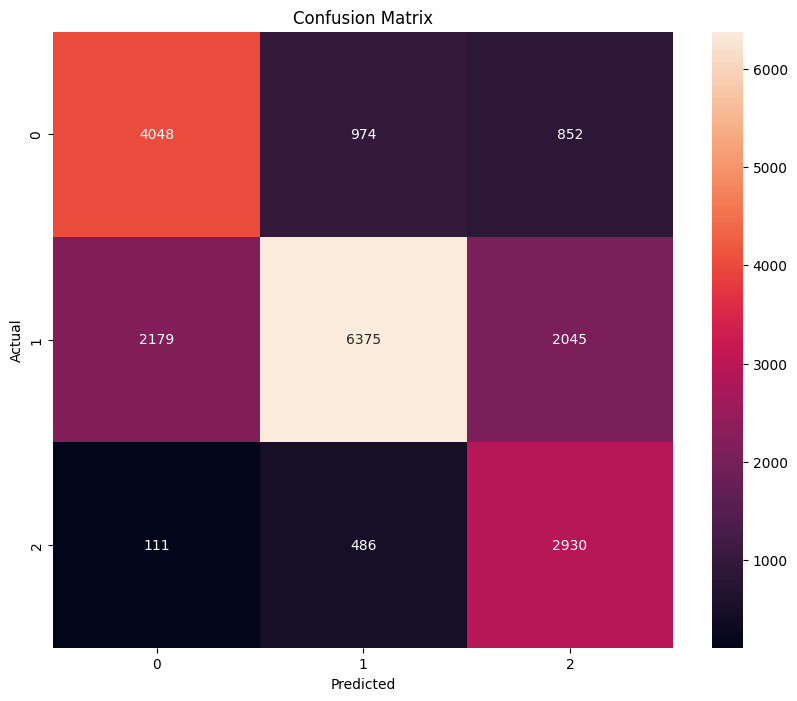

In [85]:
conf_matrix(y_test, y_pred, ['0', '1', '2'])

#### Decision Tree

In [44]:
y_pred = model_fit(DecisionTreeClassifier(), X_train_smote, X_test, y_train_smote, y_test)
measurement(X_train_smote, X_test, y_train_smote, y_test, y_pred)

Accuracy: 0.6894
Precision: 0.6720887014736716
Recall: 0.6745368076463533
f1 score: 0.6732769136986541


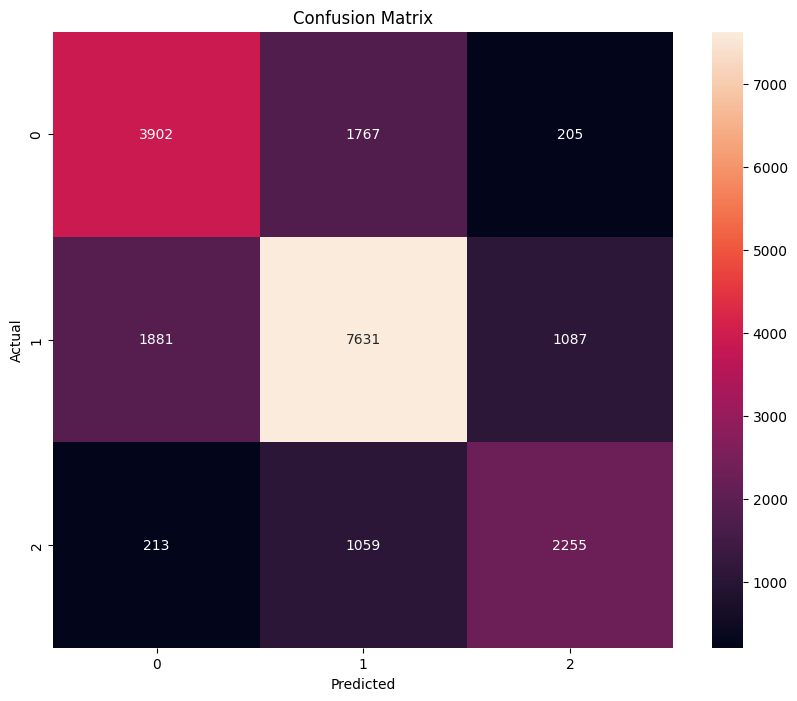

In [45]:
conf_matrix(y_test, y_pred, ['0', '1', '2'])

#### Random Forest

In [46]:
y_pred = model_fit(RandomForestClassifier(), X_train_smote, X_test, y_train_smote, y_test)
measurement(X_train_smote, X_test, y_train_smote, y_test, y_pred)

Accuracy: 0.8283
Precision: 0.8129092609312997
Recall: 0.8349547094861792
f1 score: 0.8225370730352859


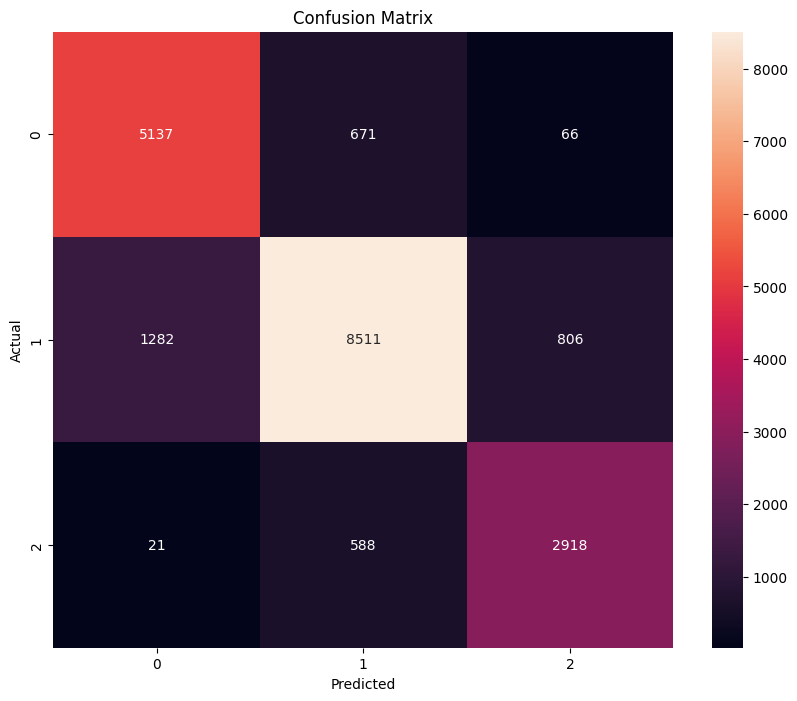

In [47]:
conf_matrix(y_test, y_pred, ['0', '1', '2'])

#### K Neighbors Classifier

In [48]:
y_pred = model_fit( KNeighborsClassifier(), X_train_smote, X_test, y_train_smote, y_test)
measurement(X_train_smote, X_test, y_train_smote, y_test, y_pred)

Accuracy: 0.66335
Precision: 0.6474598889537758
Recall: 0.6986919089045563
f1 score: 0.6561580063033211


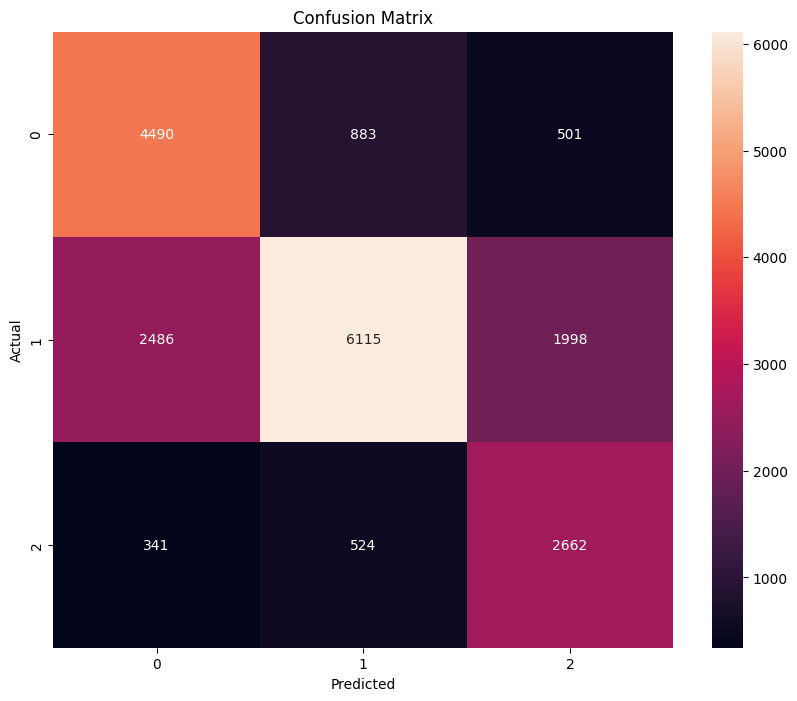

In [49]:
conf_matrix(y_test, y_pred, ['0', '1', '2'])

#### XG Boost

In [50]:
y_pred = model_fit(XGBClassifier(), X_train_smote, X_test, y_train_smote, y_test)
measurement(X_train_smote, X_test, y_train_smote, y_test, y_pred)

Accuracy: 0.7672
Precision: 0.7486886822516127
Recall: 0.7649932338685538
f1 score: 0.7559267341602215


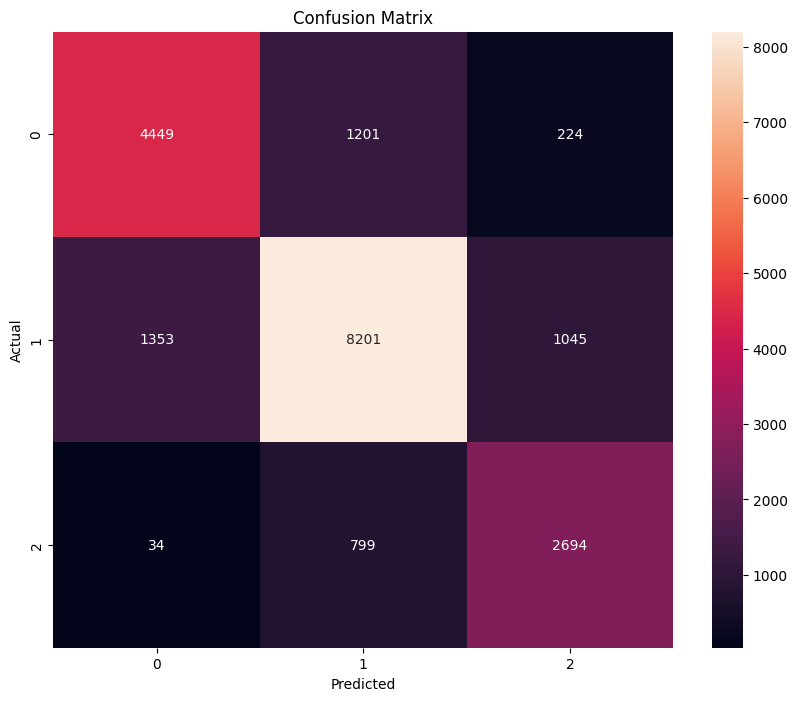

In [51]:
conf_matrix(y_test, y_pred, ['0', '1', '2'])

## Conclusion
Based on the result, random forest model has the best result. However, there is unique observation before and after I used SMOTE method.

Before I used SMOTE method, these are the result of the evaluation metrics:\
Accuracy: 0.8312\
Precision: 0.8227568214121875\
Recall: 0.8261260538590173\
f1 score: 0.8242109136530195

After I used SMOTE method, these are the result of the evaluation metrics:\
Accuracy: 0.8283\
Precision: 0.8129092609312997\
Recall: 0.8349547094861792\
f1 score: 0.8225370730352859

As all the metrics have similar value, there is no need to observe this in detail. However, if I have a specific goal (e.g. to find poor value as accurate as possible so that I can offer credit products to the right person), then observing each of metrics will be my approach.